In [3]:
import csv
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import matthews_corrcoef as MC
from sklearn.metrics import ConfusionMatrixDisplay as CMD
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
import matplotlib.pyplot as plt
from collections import Counter as Cnt
import geopandas as gpd
import pickle
import pandas as pd
import json
import random
import Utils
import numpy as np
import folium
import geopandas as gpd
import clip


plt.style.use('ggplot')


C:\Users\Johan\Anaconda3\envs\CLIP\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [4]:
def translate(ls,frm,to):
    new_ls = []
    for x in ls:
        if x == frm:
            new_ls.append(to)
        else:
            new_ls.append(x)
    return new_ls
    

https://public.opendatasoft.com/explore/dataset/georef-world-country-millesime/export/?disjunctive.cntry_code&disjunctive.cntry_name_en

geojson world map


In [5]:
with open("../../country_data_final.pickle", 'rb') as handle:
    data = pickle.load(handle)
with open("../../mapillary/train.json") as file:
    metadata = json.load(file)
with open("../pickles/country_to_region.json") as file:
    region_to_country = json.load(file)
    

In [388]:
# data

In [391]:
c_set = set()
for file in data:
    try:
        if data[file]["country"] == "France":
            c_set.add(data[file]["state"])
    except:
        pass
        
c_counts = {c:0 for c in c_set}
for file in data:
    try:
        if data[file]["country"] == "France":
            c_counts[data[file]["state"]] +=1
    except:
        pass
    

In [392]:
c_counts

{'Grand Est': 2336,
 'Centre-Loire Valley': 126,
 'Martinique': 149,
 'Bourgogne-Franche-Comté': 535,
 'Pays de la Loire': 153,
 'Ile-de-France': 283,
 'Occitania': 3102,
 'Guadeloupe': 129,
 'Normandy': 715,
 'Corsica': 78,
 'Auvergne-Rhône-Alpes': 1712,
 'Brittany': 2557,
 "Provence-Alpes-Côte d'Azur": 3516,
 'Mayotte': 820,
 'Hauts-de-France': 1360,
 'New Aquitaine': 3338,
 'French Guiana': 630,
 'Réunion': 1412}

In [340]:
# data

In [382]:
# result_file = "country100_region_results.csv"
# result_file = "country100_country_from_region_results.csv"

# result_file = "country100_results.csv"
# result_file =  "US_states_max100_results.csv"
# result_file = "city300_results.csv"
result_file = "France_states_max100_results.csv"
# result_file = "country100_mixedprompt_results.csv"
# result_file = "filtered_country100_results.csv"





In [353]:
result_file[:-12]

'France_states_max100'

In [383]:
gold, predicts, probs, filenames = Utils.read_resultcsv(result_file)
predict = [x[0] for x in predicts]
with open(f"../label_counts/{result_file[:-12]}_labelcount.json",encoding="utf-8") as file:
    label_counts = json.load(file)

In [384]:
print(result_file[:-12])
print(f"{acc(gold,predict):.2f}")
print(f"{f1(gold,predict,average='macro'):.2f}")


France_states_max100
0.28
0.26


In [347]:
len(set(gold))

50

In [398]:
# set(predict)

In [397]:
# set(gold)

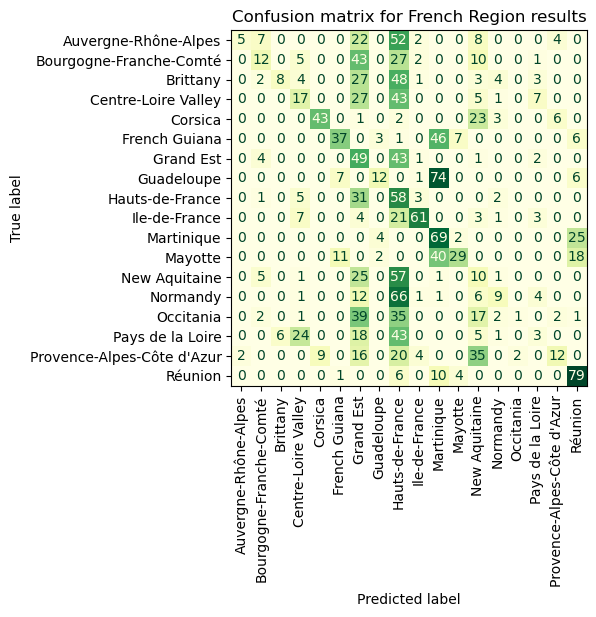

In [12]:
result_file = "France_states_max100_results.csv"
gold, predicts, probs, filenames = Utils.read_resultcsv(result_file)
predict = [x[0] for x in predicts]
with open(f"../label_counts/{result_file[:-12]}_labelcount.json",encoding="utf-8") as file:
    label_counts = json.load(file)
frm = 'Provence-Alpes-Côte d\'Azur"'
to = "Provence-Alpes-Côte d'Azur"
predict = translate(predict,frm,to)

plt.style.use('default')

fig, ax = plt.subplots(figsize=(6,6))
font = {'size':'32'}
CMD.from_predictions(gold,predict,xticks_rotation="vertical", ax=ax,cmap="YlGn",colorbar=False)
plt.title("Confusion matrix for French Region results")
# plt.rc('font',**font)
plt.rcParams.update({'font.size': 1})

plt.tight_layout()

plt.savefig("../figures/French_Region_CM.png",bbox_inches='tight', 
               transparent=True,
               pad_inches=0,
           dpi=500)

# U.S States

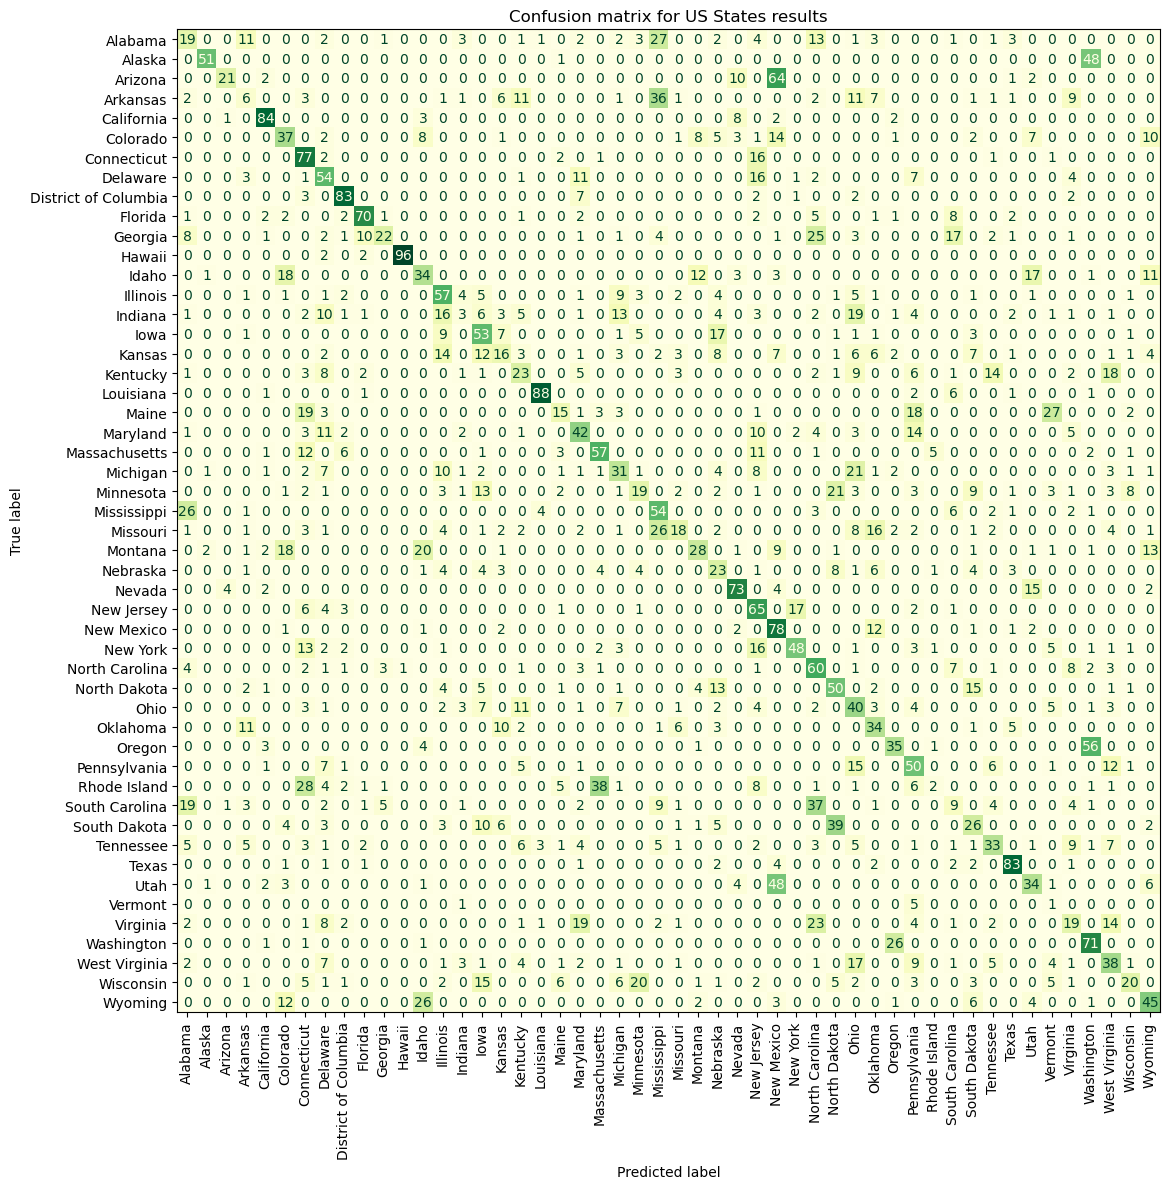

In [6]:
result_file =  "US_states_max100_results.csv"
gold, predicts, probs, filenames = Utils.read_resultcsv(result_file)
predict = [x[0] for x in predicts]
with open(f"../label_counts/{result_file[:-12]}_labelcount.json",encoding="utf-8") as file:
    label_counts = json.load(file)

plt.style.use('default')

fig, ax = plt.subplots(figsize=(12,12))

CMD.from_predictions(gold,predict,xticks_rotation="vertical", ax=ax,cmap="YlGn",colorbar=False)
plt.title("Confusion matrix for US States results")
plt.tight_layout()

plt.savefig("../figures/US_States_CM.png",bbox_inches='tight', 
               transparent=True,
               pad_inches=0,
           dpi=500)

In [314]:
labels[0:100:10]

('Vermont', 'Missouri', 'Montana', 'North Carolina', 'Massachusetts')

In [315]:
label_counts = [(val,key) for key,val in label_counts.items()]
label_counts.sort()
label_counts_15 = [*label_counts[:5],*label_counts[55:60],*label_counts[-5:]]
label_counts_15 = [(key,value[1:]) for key,value in label_counts_15]

In [316]:
# label_counts_15
#goldsel, predsel = Utils.filter_classes(gold,predict,selection)

In [325]:
label_counts_15_selection = ["North Macedonia","Côte d'Ivoire",'Czechia','Comoros','Democratic Republic of the Congo',"Finland","Qatar","Denmark","Cambodia","Ethiopia","France","Australia","Japan","China","India"]

In [327]:
frm = 'Côte d\'Ivoire"'
to = "Côte d'Ivoire"
predict = translate(predict,frm,to)
goldsel,predsel = Utils.filter_classes(gold,predict,label_counts_15_selection)


In [329]:
# set(predict)

In [330]:
frm = 'Democratic Republic of the Congo'
to = "DR Congo"
goldsel,predsel = translate(goldsel,frm,to), translate(predsel,frm,to)
label_counts_15_selection = translate(label_counts_15_selection,frm,to)

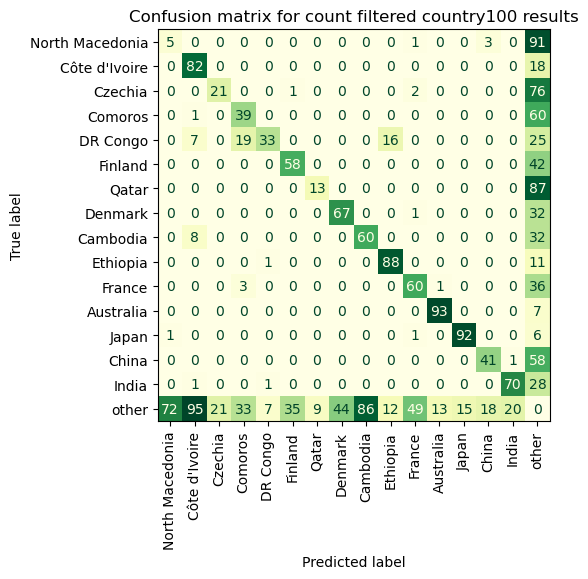

In [333]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8, 8))
font = {'size':'60'}
CMD.from_predictions(goldsel,predsel,xticks_rotation="vertical", ax=ax,labels=label_counts_15_selection+["other"],cmap="YlGn",colorbar=False)
plt.title("Confusion matrix for count filtered country100 results")
# plt.rc('font',**font)
plt.rcParams.update({'font.size': 80})
plt.tight_layout()
plt.savefig("../figures/country100_15filt_CM.png",bbox_inches='tight', 
               transparent=True,
               pad_inches=0,
           dpi=600)

In [342]:
# set(predict)

# City300

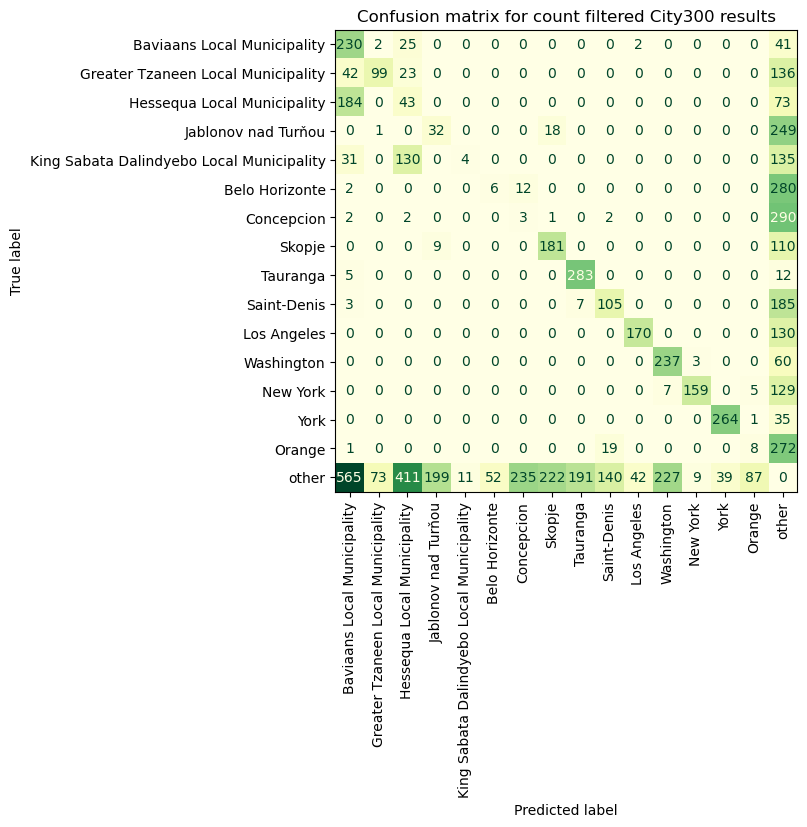

In [28]:
result_file = "city300_results.csv"
gold, predicts, probs, filenames = Utils.read_resultcsv(result_file)
predict = [x[0] for x in predicts]

with open(f"../label_counts/city300_label_counts_tokens.json",encoding="utf-8") as file:
    label_counts = json.load(file)
label_counts = [(val,key) for key,val in label_counts.items()]
label_counts.sort()
label_counts_15 = [*label_counts[:5],*label_counts[128:133],*label_counts[-5:]]
label_counts_15 = [(key,value) for key,value in label_counts_15]
counts,label_counts_15_selection = zip(*label_counts_15)
label_counts_15_selection = list(label_counts_15_selection)
goldsel,predsel = Utils.filter_classes(gold,predict,label_counts_15_selection)


fig, ax = plt.subplots(figsize=(6, 6))
plt.style.use('default')
CMD.from_predictions(goldsel,predsel,xticks_rotation="vertical", ax=ax,labels=label_counts_15_selection+["other"],cmap="YlGn",colorbar=False)
plt.title("Confusion matrix for count filtered City300 results")
# plt.tight_layout()
plt.savefig("../figures/city300_15filt_CM.png",bbox_inches='tight', 
               transparent=True,
               pad_inches=0,
           dpi=600)

In [39]:
countfrance = 0
other = 0
countcali = 0
for gold1, file in zip(gold,filenames):
    if gold1 == "Orange":
        if data[file]["state"] == "California":
            countcali += 1
        elif data[file]["country"] == "France":
            countfrance += 1
        else:
            other +=1
print(countfrance, countcali, other)
    

177 123 0


In [37]:
"Orange" in set(gold)

True